<a href="https://colab.research.google.com/github/Oluwatomilola-Agbede/Descriptive-Analysis-of-311-Contact-Centre-Metrics-2023-2024-/blob/main/Descriptive_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

file_path_2023 = '/content/3-1-1-contact-centre-metrics-2023.xlsx'
file_path_2024 = '/content/3-1-1-contact-centre-metrics-2024.xlsx'

data_2023 = pd.read_excel(file_path_2023)
data_2024 = pd.read_excel(file_path_2024)

data_2023['Year'] = 2023
data_2024['Year'] = 2024
combined_data = pd.concat([data_2023, data_2024], ignore_index=True)

# 1. Check for missing values
missing_values = combined_data.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

# Handle missing values (Example: Drop rows with missing 'CallsHandled' or 'ServiceLevel')
combined_data.dropna(subset=['CallsHandled', 'ServiceLevel'], inplace=True)

# 2. Correct data types
# Ensure 'Date' is in datetime format
combined_data['Date'] = pd.to_datetime(combined_data['Date'], errors='coerce')

# Ensure numeric fields have the correct data type
numeric_columns = ['CallsOffered', 'CallsHandled', 'CallsAbandoned', 'AverageSpeedofAnswer', 'ServiceLevel']
combined_data[numeric_columns] = combined_data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# 3. Remove duplicates
combined_data.drop_duplicates(inplace=True)

# 4. Handle holidays or non-working days
# Assuming non-working days can be marked as holidays
# For demonstration, let's say weekends are non-working days
combined_data['Weekday'] = combined_data['Date'].dt.weekday
# Remove weekends (Saturday = 5, Sunday = 6)
cleaned_data = combined_data[~combined_data['Weekday'].isin([5, 6])]

# Final cleaned data preview
print("Cleaned Data Preview:")
print(cleaned_data.head())

# Saving the cleaned data to a new Excel file (optional)
cleaned_data.to_excel('/content/cleaned_311_data_2023_2024.xlsx', index=False)


Missing Values in Each Column:
Date                    0
CallsOffered            0
CallsHandled            0
CallsAbandoned          0
AverageSpeedofAnswer    0
ServiceLevel            0
BI_ID                   0
Year                    0
dtype: int64
Cleaned Data Preview:
        Date  CallsOffered  CallsHandled  CallsAbandoned  \
2 2023-12-29           933           908              17   
3 2023-12-28           918           912               5   
4 2023-12-27           956           955               0   
5 2023-12-26           486           474              12   
6 2023-12-25           156           155               1   

   AverageSpeedofAnswer  ServiceLevel  BI_ID  Year  Weekday  
2             24.283040      0.858072    216  2023        4  
3              5.148026      0.967213    217  2023        3  
4              0.941361      0.997908    218  2023        2  
5              8.289030      0.930962    219  2023        1  
6              1.974194      0.987179    220  2023     

In [ ]:
# Import necessary libraries
import pandas as pd

# Assuming the cleaned dataset is stored in a DataFrame called 'cleaned_data'

# Split data by year for distinct analysis
data_2023 = cleaned_data[cleaned_data['Year'] == 2023]
data_2024 = cleaned_data[cleaned_data['Year'] == 2024]

# Descriptive Statistics for Calls Offered vs. Calls Handled
# 1. Total calls offered and handled for each year
total_calls_offered_2023 = data_2023['CallsOffered'].sum()
total_calls_handled_2023 = data_2023['CallsHandled'].sum()
handling_rate_2023 = total_calls_handled_2023 / total_calls_offered_2023

total_calls_offered_2024 = data_2024['CallsOffered'].sum()
total_calls_handled_2024 = data_2024['CallsHandled'].sum()
handling_rate_2024 = total_calls_handled_2024 / total_calls_offered_2024

print(f"2023 - Total Calls Offered: {total_calls_offered_2023}, Total Calls Handled: {total_calls_handled_2023}, Handling Rate: {handling_rate_2023:.2%}")
print(f"2024 - Total Calls Offered: {total_calls_offered_2024}, Total Calls Handled: {total_calls_handled_2024}, Handling Rate: {handling_rate_2024:.2%}")

# 2. Call Abandonment Rate (Daily, Monthly, Overall)
data_2023['AbandonmentRate'] = data_2023['CallsAbandoned'] / data_2023['CallsOffered']
data_2024['AbandonmentRate'] = data_2024['CallsAbandoned'] / data_2024['CallsOffered']

# Daily Abandonment Rate
print(f"2023 - Average Daily Abandonment Rate: {data_2023['AbandonmentRate'].mean():.2%}")
print(f"2024 - Average Daily Abandonment Rate: {data_2024['AbandonmentRate'].mean():.2%}")

# Monthly Abandonment Rate
# Group data by month and calculate monthly abandonment rates
data_2023['Month'] = data_2023['Date'].dt.to_period('M')
data_2024['Month'] = data_2024['Date'].dt.to_period('M')

monthly_abandonment_2023 = data_2023.groupby('Month').apply(lambda x: x['CallsAbandoned'].sum() / x['CallsOffered'].sum())
monthly_abandonment_2024 = data_2024.groupby('Month').apply(lambda x: x['CallsAbandoned'].sum() / x['CallsOffered'].sum())

print("2023 - Monthly Abandonment Rates:")
print(monthly_abandonment_2023)
print("2024 - Monthly Abandonment Rates:")
print(monthly_abandonment_2024)

# Overall Abandonment Rate
overall_abandonment_rate_2023 = data_2023['CallsAbandoned'].sum() / data_2023['CallsOffered'].sum()
overall_abandonment_rate_2024 = data_2024['CallsAbandoned'].sum() / data_2024['CallsOffered'].sum()

print(f"2023 - Overall Abandonment Rate: {overall_abandonment_rate_2023:.2%}")
print(f"2024 - Overall Abandonment Rate: {overall_abandonment_rate_2024:.2%}")

# 3. Average Speed of Answer (ASA)
average_ASA_2023 = data_2023['AverageSpeedofAnswer'].mean()
average_ASA_2024 = data_2024['AverageSpeedofAnswer'].mean()

print(f"2023 - Average Speed of Answer: {average_ASA_2023:.2f} seconds")
print(f"2024 - Average Speed of Answer: {average_ASA_2024:.2f} seconds")

# Correlation between ASA and Abandonment Rate
correlation_2023 = data_2023['AverageSpeedofAnswer'].corr(data_2023['AbandonmentRate'])
correlation_2024 = data_2024['AverageSpeedofAnswer'].corr(data_2024['AbandonmentRate'])

print(f"2023 - Correlation between ASA and Abandonment Rate: {correlation_2023:.2f}")
print(f"2024 - Correlation between ASA and Abandonment Rate: {correlation_2024:.2f}")

# 4. Service Level Analysis
average_service_level_2023 = data_2023['ServiceLevel'].mean()
average_service_level_2024 = data_2024['ServiceLevel'].mean()

print(f"2023 - Average Service Level: {average_service_level_2023:.2%}")
print(f"2024 - Average Service Level: {average_service_level_2024:.2%}")

# Compare to organizational target (Assume 85% is the target)
target_service_level = 0.85
service_level_comparison_2023 = "Above Target" if average_service_level_2023 >= target_service_level else "Below Target"
service_level_comparison_2024 = "Above Target" if average_service_level_2024 >= target_service_level else "Below Target"

print(f"2023 - Service Level Performance: {service_level_comparison_2023}")
print(f"2024 - Service Level Performance: {service_level_comparison_2024}")


2023 - Total Calls Offered: 356598, Total Calls Handled: 336169, Handling Rate: 94.27%
2024 - Total Calls Offered: 209694, Total Calls Handled: 194111, Handling Rate: 92.57%
2023 - Average Daily Abandonment Rate: 4.62%
2024 - Average Daily Abandonment Rate: 6.03%
2023 - Monthly Abandonment Rates:
Month
2023-01    0.061244
2023-02    0.048667
2023-03    0.047983
2023-04    0.049405
2023-05    0.047236
2023-06    0.036523
2023-07    0.044645
2023-08    0.037453
2023-09    0.036459
2023-10    0.052013
2023-11    0.056958
2023-12    0.059632
Freq: M, dtype: float64
2024 - Monthly Abandonment Rates:
Month
2024-01    0.046381
2024-02    0.072455
2024-03    0.081580
2024-04    0.053285
2024-05    0.059152
2024-06    0.046590
2024-07    0.077227
Freq: M, dtype: float64
2023 - Overall Abandonment Rate: 4.80%
2024 - Overall Abandonment Rate: 6.16%
2023 - Average Speed of Answer: 53.06 seconds
2024 - Average Speed of Answer: 76.86 seconds
2023 - Correlation between ASA and Abandonment Rate: 0.86


<ipython-input-2-c515b06b4a3c>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2023['AbandonmentRate'] = data_2023['CallsAbandoned'] / data_2023['CallsOffered']
<ipython-input-2-c515b06b4a3c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2024['AbandonmentRate'] = data_2024['CallsAbandoned'] / data_2024['CallsOffered']
<ipython-input-2-c515b06b4a3c>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

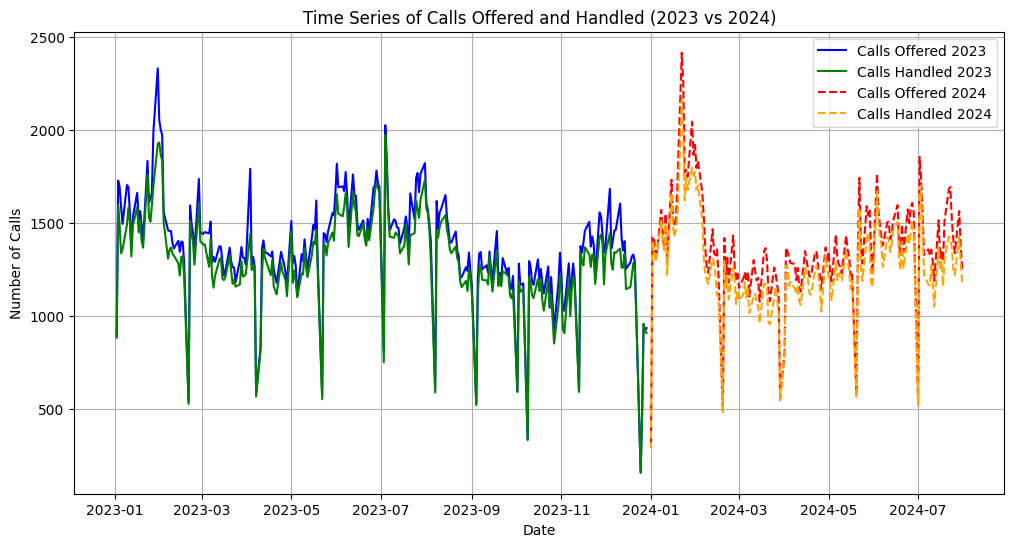

In [ ]:
import matplotlib.pyplot as plt

# Plot time series for Calls Offered and Calls Handled for both years
plt.figure(figsize=(12, 6))
plt.plot(data_2023['Date'], data_2023['CallsOffered'], label='Calls Offered 2023', color='blue')
plt.plot(data_2023['Date'], data_2023['CallsHandled'], label='Calls Handled 2023', color='green')
plt.plot(data_2024['Date'], data_2024['CallsOffered'], label='Calls Offered 2024', color='red', linestyle='--')
plt.plot(data_2024['Date'], data_2024['CallsHandled'], label='Calls Handled 2024', color='orange', linestyle='--')

plt.title('Time Series of Calls Offered and Handled (2023 vs 2024)')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.legend()
plt.grid(True)
plt.show()


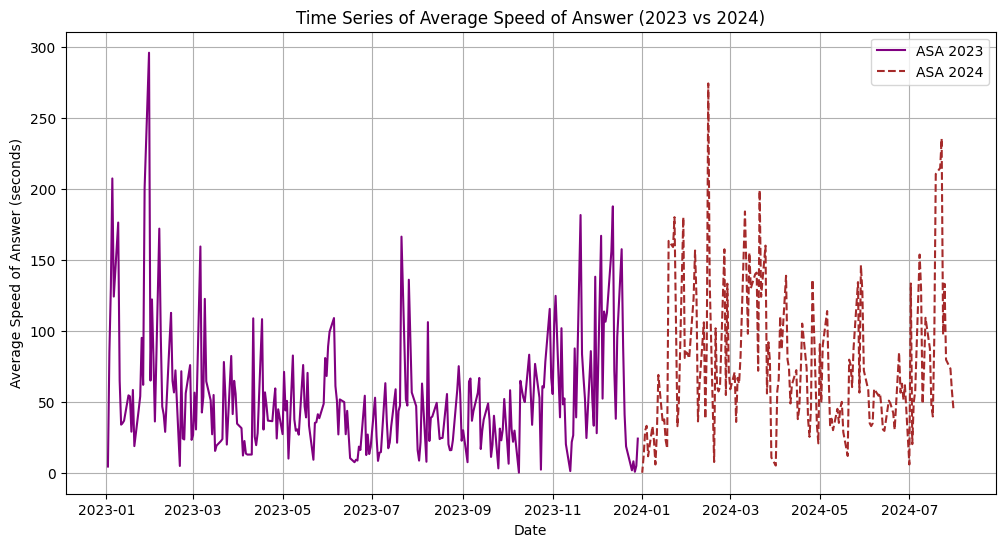

In [ ]:
# Plot time series for Average Speed of Answer (ASA)
plt.figure(figsize=(12, 6))
plt.plot(data_2023['Date'], data_2023['AverageSpeedofAnswer'], label='ASA 2023', color='purple')
plt.plot(data_2024['Date'], data_2024['AverageSpeedofAnswer'], label='ASA 2024', color='brown', linestyle='--')

plt.title('Time Series of Average Speed of Answer (2023 vs 2024)')
plt.xlabel('Date')
plt.ylabel('Average Speed of Answer (seconds)')
plt.legend()
plt.grid(True)
plt.show()


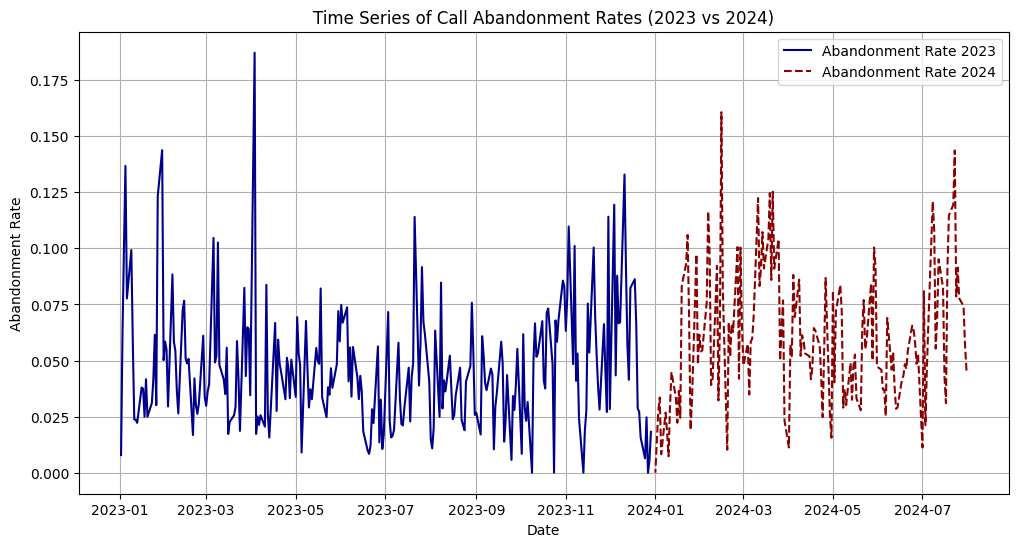

In [ ]:
# Plot time series for Call Abandonment Rates
plt.figure(figsize=(12, 6))
plt.plot(data_2023['Date'], data_2023['AbandonmentRate'], label='Abandonment Rate 2023', color='darkblue')
plt.plot(data_2024['Date'], data_2024['AbandonmentRate'], label='Abandonment Rate 2024', color='darkred', linestyle='--')

plt.title('Time Series of Call Abandonment Rates (2023 vs 2024)')
plt.xlabel('Date')
plt.ylabel('Abandonment Rate')
plt.legend()
plt.grid(True)
plt.show()


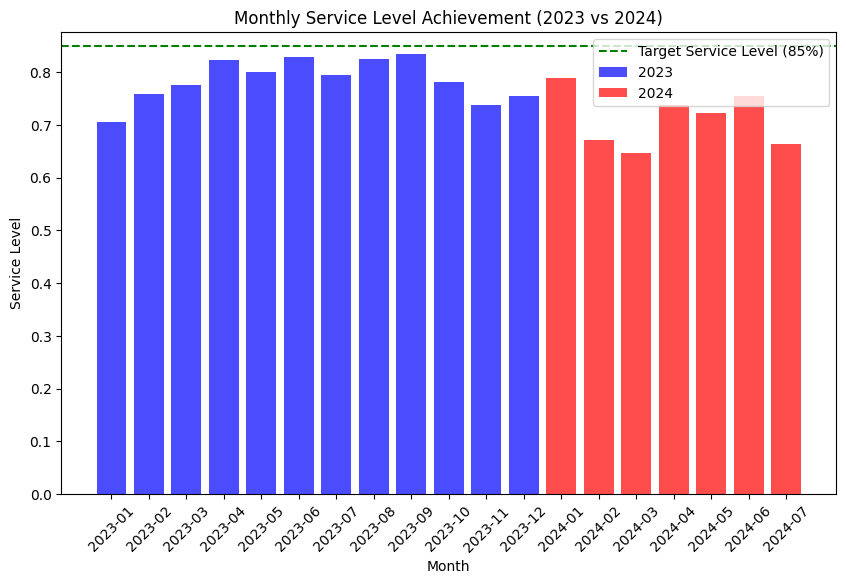

In [ ]:
# Group by month to calculate average service level
monthly_service_2023 = data_2023.groupby('Month')['ServiceLevel'].mean()
monthly_service_2024 = data_2024.groupby('Month')['ServiceLevel'].mean()

# Bar plot to compare service level achievements
plt.figure(figsize=(10, 6))
plt.bar(monthly_service_2023.index.astype(str), monthly_service_2023, label='2023', color='blue', alpha=0.7)
plt.bar(monthly_service_2024.index.astype(str), monthly_service_2024, label='2024', color='red', alpha=0.7)

plt.axhline(y=0.85, color='green', linestyle='--', label='Target Service Level (85%)')
plt.title('Monthly Service Level Achievement (2023 vs 2024)')
plt.xlabel('Month')
plt.ylabel('Service Level')
plt.legend()
plt.xticks(rotation=45)
plt.show()


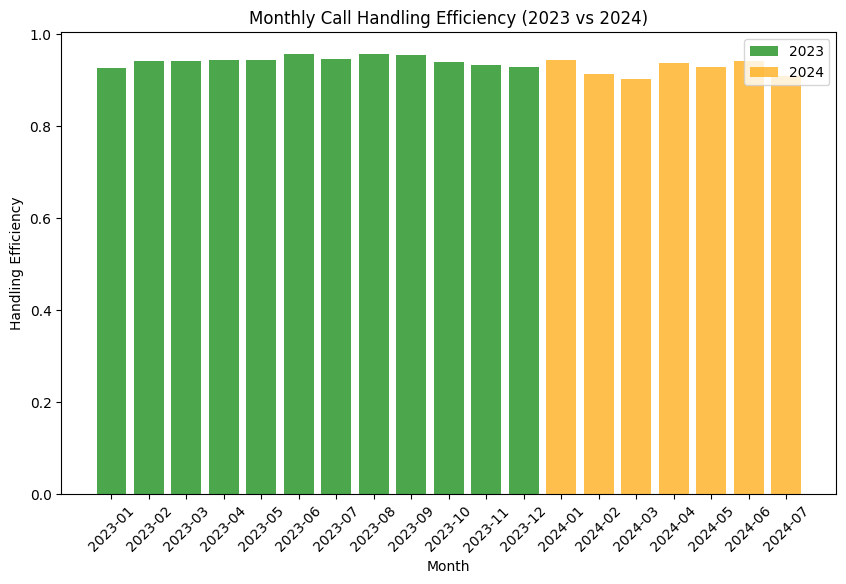

In [ ]:
# Calculate handling efficiency (Handled / Offered) by month
handling_efficiency_2023 = data_2023.groupby('Month').apply(lambda x: x['CallsHandled'].sum() / x['CallsOffered'].sum())
handling_efficiency_2024 = data_2024.groupby('Month').apply(lambda x: x['CallsHandled'].sum() / x['CallsOffered'].sum())

# Bar plot for call handling efficiency
plt.figure(figsize=(10, 6))
plt.bar(handling_efficiency_2023.index.astype(str), handling_efficiency_2023, label='2023', color='green', alpha=0.7)
plt.bar(handling_efficiency_2024.index.astype(str), handling_efficiency_2024, label='2024', color='orange', alpha=0.7)

plt.title('Monthly Call Handling Efficiency (2023 vs 2024)')
plt.xlabel('Month')
plt.ylabel('Handling Efficiency')
plt.legend()
plt.xticks(rotation=45)
plt.show()


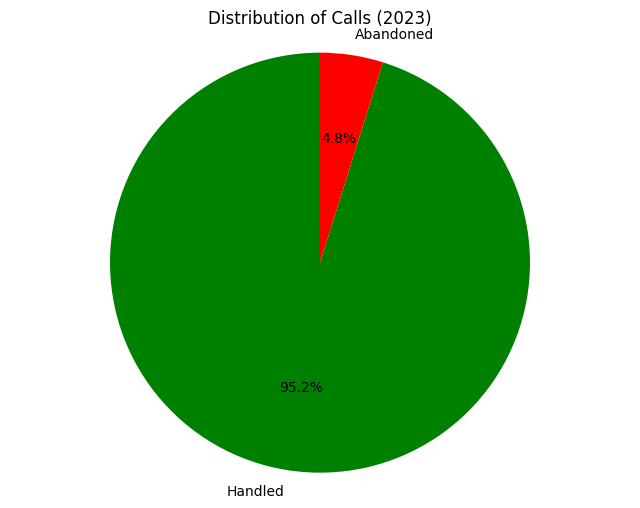

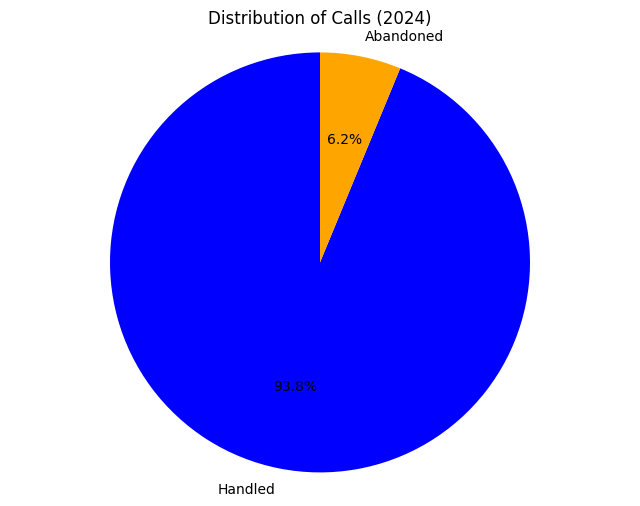

In [ ]:
# For 2023
handled_2023 = data_2023['CallsHandled'].sum()
abandoned_2023 = data_2023['CallsAbandoned'].sum()
labels = ['Handled', 'Abandoned']
sizes_2023 = [handled_2023, abandoned_2023]

# For 2024
handled_2024 = data_2024['CallsHandled'].sum()
abandoned_2024 = data_2024['CallsAbandoned'].sum()
sizes_2024 = [handled_2024, abandoned_2024]

# Plot for 2023
plt.figure(figsize=(8, 6))
plt.pie(sizes_2023, labels=labels, autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
plt.title('Distribution of Calls (2023)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Plot for 2024
plt.figure(figsize=(8, 6))
plt.pie(sizes_2024, labels=labels, autopct='%1.1f%%', startangle=90, colors=['blue', 'orange'])
plt.title('Distribution of Calls (2024)')
plt.axis('equal')
plt.show()


<ipython-input-9-1386ab22f312>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2023['Hour'] = data_2023['Date'].dt.hour
<ipython-input-9-1386ab22f312>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2024['Hour'] = data_2024['Date'].dt.hour


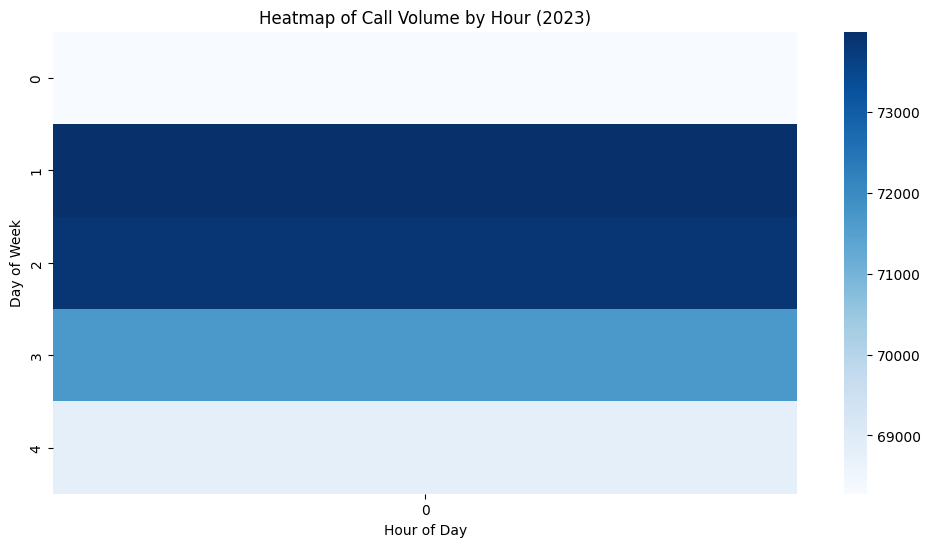

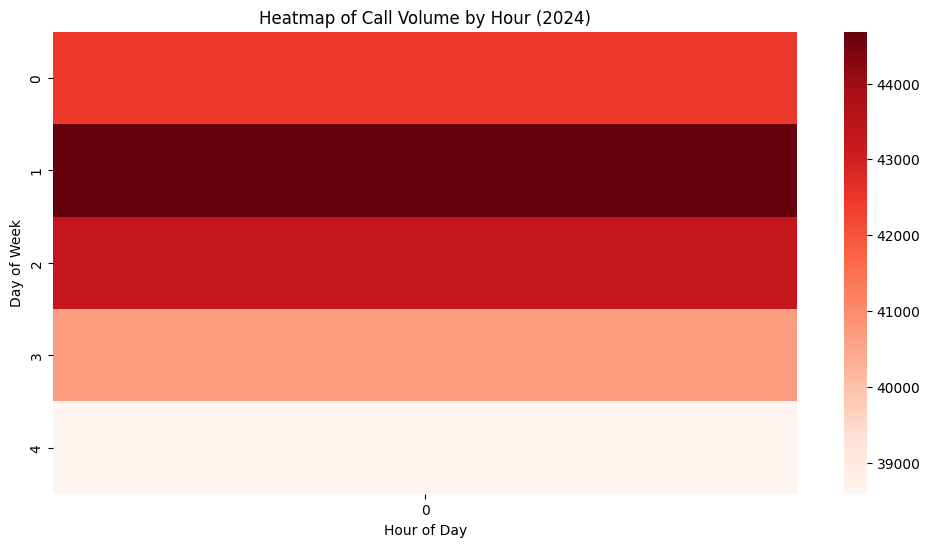

In [ ]:
import seaborn as sns

# Group data by weekday and hour to visualize peak call volume times
data_2023['Hour'] = data_2023['Date'].dt.hour
data_2024['Hour'] = data_2024['Date'].dt.hour

# Create pivot table for heatmap visualization
heatmap_data_2023 = data_2023.pivot_table(values='CallsOffered', index='Weekday', columns='Hour', aggfunc='sum')
heatmap_data_2024 = data_2024.pivot_table(values='CallsOffered', index='Weekday', columns='Hour', aggfunc='sum')

# Heatmap for 2023
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data_2023, cmap='Blues', annot=False)
plt.title('Heatmap of Call Volume by Hour (2023)')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

# Heatmap for 2024
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data_2024, cmap='Reds', annot=False)
plt.title('Heatmap of Call Volume by Hour (2024)')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()


In [ ]:
# Identify high call volume days (Assume threshold as 90th percentile)
high_volume_threshold_2023 = data_2023['CallsOffered'].quantile(0.90)
high_volume_days_2023 = data_2023[data_2023['CallsOffered'] > high_volume_threshold_2023]

high_volume_threshold_2024 = data_2024['CallsOffered'].quantile(0.90)
high_volume_days_2024 = data_2024[data_2024['CallsOffered'] > high_volume_threshold_2024]

print("High Call Volume Days in 2023:")
print(high_volume_days_2023[['Date', 'CallsOffered']])

print("High Call Volume Days in 2024:")
print(high_volume_days_2024[['Date', 'CallsOffered']])


High Call Volume Days in 2023:
          Date  CallsOffered
153 2023-07-31          1821
156 2023-07-28          1763
158 2023-07-26          1768
159 2023-07-25          1740
179 2023-07-05          1845
180 2023-07-04          2025
184 2023-06-30          1693
185 2023-06-29          1712
186 2023-06-28          1781
187 2023-06-27          1702
202 2023-06-12          1760
207 2023-06-07          1773
209 2023-06-05          1696
213 2023-06-01          1818
272 2023-04-03          1790
307 2023-02-27          1736
332 2023-02-02          1972
333 2023-02-01          2001
334 2023-01-31          2053
335 2023-01-30          2331
338 2023-01-27          1987
342 2023-01-23          1833
355 2023-01-10          1692
356 2023-01-09          1703
361 2023-01-04          1693
362 2023-01-03          1727
High Call Volume Days in 2024:
          Date  CallsOffered
393 2024-07-03          1745
394 2024-07-02          1854
423 2024-06-03          1765
435 2024-05-22          1742
545 2024-0

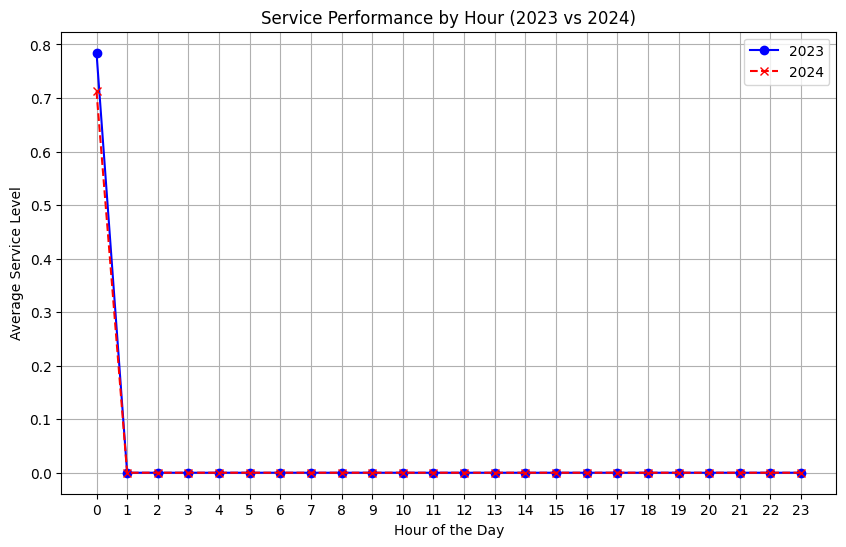

In [ ]:
# Group by Hour and calculate average service level, ensure that all hours (0-23) are represented
service_performance_by_hour_2023 = data_2023.groupby('Hour')['ServiceLevel'].mean().reindex(range(24), fill_value=0)
service_performance_by_hour_2024 = data_2024.groupby('Hour')['ServiceLevel'].mean().reindex(range(24), fill_value=0)

# Plot service performance by hour for both years
plt.figure(figsize=(10, 6))
plt.plot(service_performance_by_hour_2023.index, service_performance_by_hour_2023, label='2023', color='blue', marker='o')
plt.plot(service_performance_by_hour_2024.index, service_performance_by_hour_2024, label='2024', color='red', linestyle='--', marker='x')

plt.title('Service Performance by Hour (2023 vs 2024)')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Service Level')
plt.xticks(range(0, 24))  # Ensure all hours are visible on the x-axis
plt.legend()
plt.grid(True)
plt.show()
